In [10]:
# %load ../ML/ml.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import set_config

set_config(print_changed_only=False)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


Text(0.5, 1.0, 'Confusion matrix of the classifier')

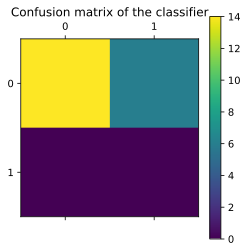

In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pylab as pl
y_test=['business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business']

pred=['health', 'business', 'business', 'business', 'business',
       'business', 'health', 'health', 'business', 'business', 'business',
       'business', 'business', 'business', 'business', 'business',
       'health', 'health', 'business', 'health']

cm = confusion_matrix(y_test, pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

**Add labels**

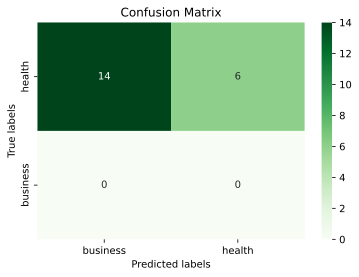

In [15]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap='Greens', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(['business', 'health']); 
ax.set_yticklabels(['health', 'business']);

**When you get the confusion_matrix, the X axis tick labels are 1, 0 and Y axis tick labels are 0, 1 (in the axis values increasing order). If the classifier is clf, you can get the class order by clf.classes_, which should match ["health", "business"] in this case. (It is assumed that business is the positive class).**

C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_17980\2851200085.py:62: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


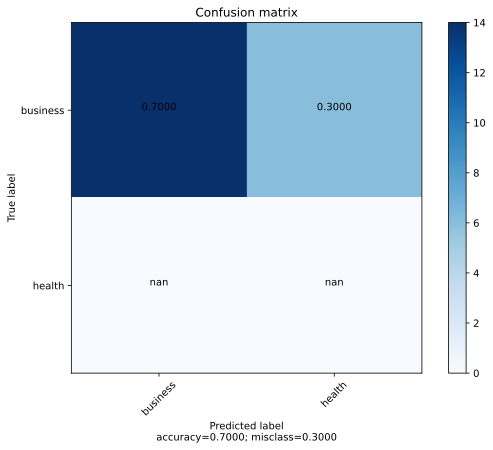

In [23]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
target_names=['business', 'health']
plot_confusion_matrix(cm,target_names=target_names,title='Confusion matrix')